In [2]:
import os
import openai

from openai import OpenAI

In [3]:
client = OpenAI()

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Function to display image from a given URL
def show_image_from_url(url):
    response = requests.get(url)                # Send a GET request to the image URL
    img = Image.open(BytesIO(response.content)) # Open the image from the bytes in the response
    plt.imshow(img)                             # Use Matplotlib to display the image
    plt.axis('off')                             # Hide the axis to only show the image
    plt.show()

In [4]:
# Saving image from the original prompt
import requests

def save_image_from_url(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:  # Check if the request was successful
        with open(file_path, 'wb') as f:  # Open a file in binary write mode
            f.write(response.content)  # Write the content of the response to the file
        print(f"Image saved at {file_path}")
    else:
        print(f"Error: Unable to retrieve image. Status code: {response.status_code}")

In [5]:
name="Subramani"
age=10
superhero="Goku from dragon ball z"
ethinicity="Indian"
morals="Savior"

response = client.images.generate(
  model="dall-e-3",
  prompt=f"Child superhero magazine cover for the child named {name} aged : {age} years old who likes \
  {superhero}, and belongs to {ethinicity} origin. Make sure for it to be containing morals of {morals}. This should be a book preview, to be directly used on a book cover",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

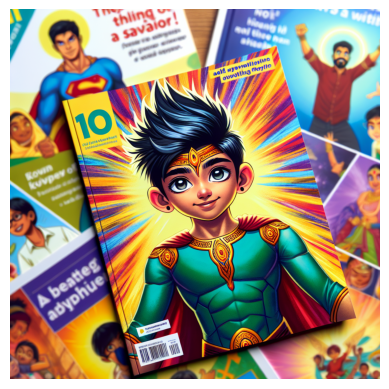

In [6]:
show_image_from_url(image_url)

In [7]:
save_image_from_url(image_url, "test_img.jpg")

Image saved at test_img.jpg


Check for multiple responses

In [9]:
response = client.images.generate(
  model="dall-e-2",
  prompt="Give me a standard image",
  size="1024x1024",
  quality="standard",
  n=2,
)

image_url = response.data[0].url


In [10]:
response.data

[Image(b64_json=None, revised_prompt=None, url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-NUA0l9mRFO3JAiZvbKQT0Dux/user-FD4nM6PuX8L8BOyl5alOeXGM/img-dIlhhsPtuYHp5DDCFj3icqy6.png?st=2024-02-08T09%3A43%3A06Z&se=2024-02-08T11%3A43%3A06Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-02-08T03%3A25%3A33Z&ske=2024-02-09T03%3A25%3A33Z&sks=b&skv=2021-08-06&sig=RcORGWmpOK54SGeas46/XeVQWiNcDaM4vsJrke/ZOMY%3D'),
 Image(b64_json=None, revised_prompt=None, url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-NUA0l9mRFO3JAiZvbKQT0Dux/user-FD4nM6PuX8L8BOyl5alOeXGM/img-0N0q3nhw1iGMiLmEtKPspNce.png?st=2024-02-08T09%3A43%3A06Z&se=2024-02-08T11%3A43%3A06Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-02-08T03%3A25%3A33Z&ske=2024-02-09T03%3A25%3A33Z&sks=b&skv=2021-08-06&sig=n8